# Rebuild R Model Selection on Coffee Prices

- Attempt to reproduce coffee prices/percentage change analysis in Python, starting from model selection

In [16]:
#libraries
import os #lets us interact with underlying operating system
import numpy as np #
from sklearn.linear_model import LinearRegression #if we want to use sklearn linear regression
import statsmodels.formula.api as smf
import pandas as pd

In [68]:
train = pd.read_csv('./Dataset/train.csv')
train = train.drop(['Unnamed: 0'],1)
final_test = pd.read_csv('./Dataset/test.csv')
final_test = final_test.drop(['Unnamed: 0'], 1)

In [69]:
print(list(train))

['Date_Index', 'Celsius', 'Rainfall', 'Real_USD', 'FX_Return', 'Production', 'ProdChange', 'ONI', 'logCoffee_Price', 'Summer', 'Fall', 'Winter', 'Spring', 'lagged_temp', 'lagged_rain', 'lagged_oni', 'Season', 'row_id', 'lagged_logCoffee', 'CoffeeReturn', 'Jan2010', 'Jan2012', 'Jan2011']


In [72]:
train.head()

,Date_Index,Celsius,Rainfall,Real_USD,FX_Return,Production,ProdChange,ONI,logCoffee_Price,Summer,...,lagged_temp,lagged_rain,lagged_oni,Season,row_id,lagged_logCoffee,CoffeeReturn,Jan2010,Jan2012,Jan2011
0,Feb 2009,25.8547,245.226,2.3230,0.654,2.360383,-0.150173,-0.6,4.846429,1,...,25.7319,236.915,-1.3,SUMMER,1,4.910062,-6.363253,0,0,0
1,Mar 2009,26.1097,262.495,2.3161,-0.297,2.392975,1.380793,-0.4,4.875760,0,...,25.6503,276.601,-1.1,FALL,2,4.846429,2.933108,0,0,0
2,Apr 2009,25.5711,209.818,2.2027,-4.896,2.411981,0.794241,-0.1,4.891289,0,...,25.3256,205.173,-0.9,FALL,3,4.875760,1.552834,0,0,0
3,May 2009,24.7066,148.634,2.0689,-6.074,2.407092,-0.202696,0.2,5.040243,0,...,24.1105,134.812,-0.7,FALL,4,4.891289,14.895495,0,0,0
4,Jun 2009,23.4252,103.132,1.9586,-5.331,2.413316,0.258569,0.4,4.954159,0,...,23.3868,77.829,-0.5,WINTER,5,5.040243,-8.608434,0,0,0


**Practice plotting**

In [ ]:
#I want to visualize the fit with different lambdas 
#make the plots show
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

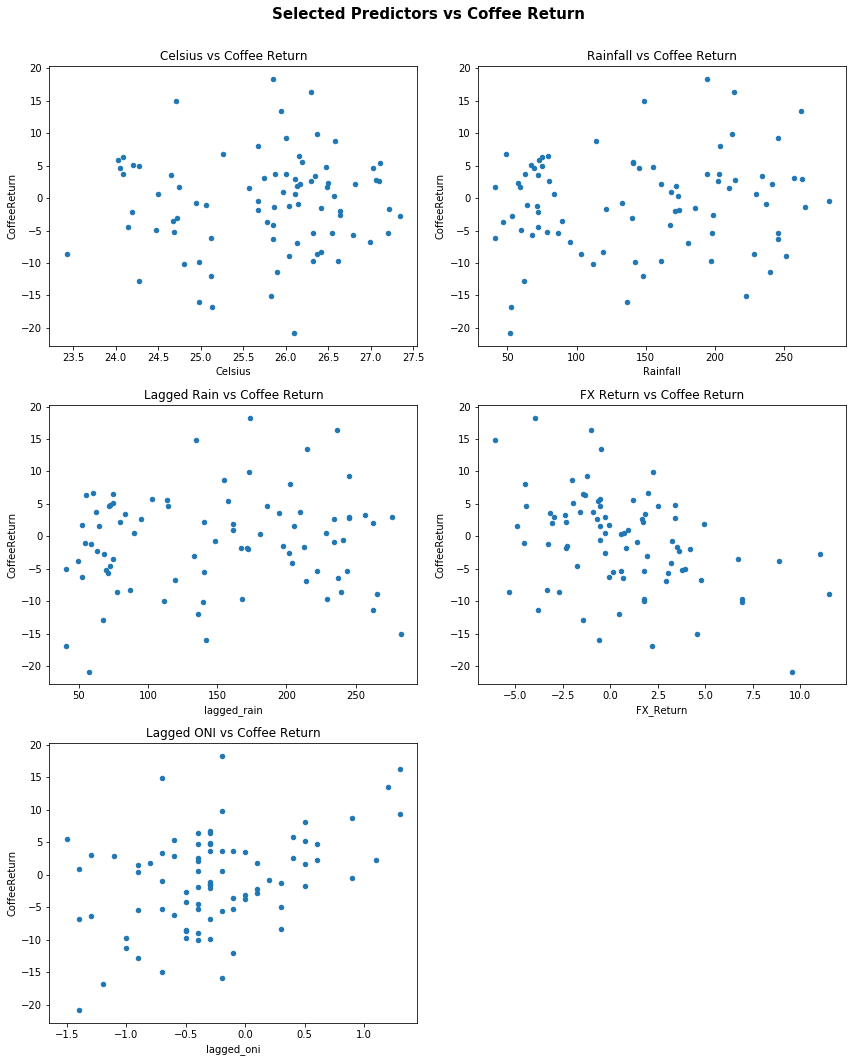

In [118]:
#create the figure
fig, ((ax1,ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3,2, figsize=(12,15))

#Title of figure
fig.suptitle('Selected Predictors vs Coffee Return', fontsize=15, fontweight='bold');

#plot the data
train.plot(kind='scatter', x='Celsius', y='CoffeeReturn', ax=ax1)
ax1.set(title='Celsius vs Coffee Return')

train.plot(kind='scatter', x='Rainfall', y='CoffeeReturn', ax=ax2)
ax2.set(title='Rainfall vs Coffee Return')

train.plot(kind='scatter', x='lagged_rain', y='CoffeeReturn', ax=ax3)
ax3.set(title='Lagged Rain vs Coffee Return')

train.plot(kind='scatter', x='FX_Return', y='CoffeeReturn', ax=ax4)
ax4.set(title='FX Return vs Coffee Return')

train.plot(kind='scatter', x='lagged_oni', y='CoffeeReturn', ax=ax5)
ax5.set(title='Lagged ONI vs Coffee Return')

#Delete extra subplot
fig.delaxes(ax6)

#Tight layout
#tight_layout docs: [left, bottom, right, top] in normalized (0, 1) figure coordinates
#https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.tight_layout.html
#bottom left corner (0,0) top right corner (1,1) default (0,0,1,1)
fig.tight_layout(rect=[0, 0, 1, 0.95])

In [5]:
#Get initial linear regression
output = smf.ols('''CoffeeReturn ~ Celsius + Rainfall + lagged_rain + FX_Return 
                    + lagged_oni + Winter + Jan2010 + Jan2012 + Jan2011''', data=train).fit()

In [6]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CoffeeReturn   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     4.463
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           0.000111
Time:                        20:51:03   Log-Likelihood:                -265.44
No. Observations:                  83   AIC:                             550.9
Df Residuals:                      73   BIC:                             575.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -59.6622     33.411     -1.786      0.078    -126.250       6.925
Celsius         2.2045      1.262      1.747      0.085      -0.310       4.719
Rainfall        0.0468      0.034      1.373      0.174      -0.021       0.115
lagged_rain    -0.0282      0.033     -0.862      0.391      -0.093       0.037
FX_Return      -0.7142      0.204     -3.494      0.001      -1.122      -0.307
lagged_oni      4.7022      1.200      3.918      0.000       2.310       7.094
Winter          4.6138      3.113      1.482      0.143      -1.590      10.817
Jan2010        -4.2640      6.516     -0.654      0.515     -17.251       8.723
Jan2012         4.8628      6.615      0.735      0.465      -8.321      18.046
Jan2011         0.0790      6.747      0.012      0.991     -13.368      13.526
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.092
Skew:                          -0.003   Prob(JB):                        0.955
Kurtosis:                       3.163   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = output.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
for i in range(10):
    print(output.params.index[i],':', vif[i])

Intercept : 2321.485552729827
Celsius : 2.859970655820971
Rainfall : 12.00811460359824
lagged_rain : 11.576584061622231
FX_Return : 1.1125268248263849
lagged_oni : 1.158554610022528
Winter : 3.8079723375360954
Jan2010 : 1.0511469189092526
Jan2012 : 1.083206084452123
Jan2011 : 1.126916838589301


In [8]:
#Prep for sklearn, need to be numpy arrays and matrixes
X_array = train[['Celsius', 'Rainfall', 'lagged_rain', 'FX_Return', 'lagged_oni', 'Winter', 'Jan2010', 'Jan2012',
              'Jan2011']]
X_array = X_array.values

Y_array = train['CoffeeReturn']
Y_array = Y_array.values

In [29]:
#Lets test and see if linear regression looks the same
#Looks good to me
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(X_array, Y_array)
lin_reg.intercept_, lin_reg.coef_

(-59.66215957976141,
 array([ 2.20448011,  0.04679598, -0.02815823, -0.71420371,  4.70218913,
         4.61382788, -4.26404658,  4.86275293,  0.0789858 ]))

## Regularization

**The cross-validation here is INCORRECT.** We should have separated the data into K folds, leave one out, get the best predictors excluding kth fold, build the model on 1-kth and then do validation on the Kth fold. The idea is to recreate the "experiment" of testing on independent data, selecting the predictors on the test data is not independent.

In [10]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", normalize=True, random_state=40) 

ridge_reg.fit(X_array, Y_array)
ridge_reg.intercept_, ridge_reg.coef_

(-8.286033551948531,
 array([ 2.79330962e-01,  5.44163606e-03,  1.65920366e-03, -3.80301186e-01,
         2.35945667e+00,  2.77263454e-01, -1.94809706e+00,  2.15259114e+00,
         2.54336353e+00]))

In [11]:
#import sklearn
#sklearn.__version_
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#standardization more vulnerable to outliers, but we have removed most unusual observations
#standardization is preferred in most situation, it centers to data whereas normalization just fits everything
#between the range of (0,1)

std_scaler = StandardScaler()
ridge_func = Ridge(alpha=1, fit_intercept=True, solver='cholesky')

ridge_reg = Pipeline([('std_scaler', std_scaler), ('ridge_func', ridge_func)])
ridge_reg = ridge_reg.fit(X_array, Y_array)

ridge_reg.named_steps['ridge_func'].intercept_, ridge_reg.named_steps['ridge_func'].coef_

(-0.8264824322333661,
 array([ 1.84175865,  2.66360854, -1.46521415, -2.54965925,  2.89679729,
         1.79548088, -0.43875347,  0.53326169,  0.0248641 ]))

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_array, Y_array,
                         scoring="neg_mean_squared_error", cv=10)
np.sqrt(-scores)

array([8.40128672, 4.04513003, 4.78056739, 8.26912827, 7.14876668,
       5.44735253, 7.5308912 , 8.87219565, 2.70816111, 5.23197857])

In [31]:
np.mean(np.sqrt(-scores))

6.243545815710189

In [120]:
##We can compare the cross-validated RMSE of models at different alphas
def ridge_cv(alpha_list, X_input, Y_input, cv_fold, standardize):
    std_scaler = StandardScaler()
    if standardize == True:
        for i in alpha_list:
            ridge_func = Ridge(alpha=i, fit_intercept=True, solver='cholesky')
            ridge_reg = Pipeline([('std_scaler', std_scaler), ('ridge_func', ridge_func)])
            scores = cross_val_score(ridge_reg, X_input, Y_input, scoring='neg_mean_squared_error', cv=cv_fold)
            print('alpha ', i, ':', np.mean(np.sqrt(-scores)))
    if standardize == False:
        for i in alpha_list:
            ridge_func = Ridge(alpha=i, fit_intercept=True, solver='cholesky')
            socres = cross_val_score(ridge_reg, X_input, Y_input, scoring='neg_mean_squared_error', cv=cv_fold)
            print('alpha ', i, ':', np.mean(np.sqrt(-scores)))

In [121]:
#we get a slight improvement in RMSE
ridge_cv([0, 0.1,1, 5, 10, 30], X_array, Y_array, 10, standardize=True)

alpha  0 : 6.243545815710191
alpha  0.1 : 6.239792445157169
alpha  1 : 6.218225202228922
alpha  5 : 6.202123611462007
alpha  10 : 6.218018524444505
alpha  30 : 6.333438804244393


In [122]:
#we get a slight improvement in RMSE
ridge_cv([1, 2, 3, 4, 5, 6, 7, 8], X_array, Y_array, 10, standardize=True)

alpha  1 : 6.218225202228922
alpha  2 : 6.20761073546945
alpha  3 : 6.203064302660308
alpha  4 : 6.201650348836816
alpha  5 : 6.202123611462007
alpha  6 : 6.203861079061407
alpha  7 : 6.206508633409495
alpha  8 : 6.209844021846904


In [123]:
#Best ridge
ridge_func = Ridge(alpha=3, fit_intercept=True, solver='cholesky')

ridge_reg = Pipeline([('std_scaler', std_scaler), ('ridge_func', ridge_func)])
ridge_reg = ridge_reg.fit(X_array, Y_array)

ridge_reg.named_steps['ridge_func'].intercept_, ridge_reg.named_steps['ridge_func'].coef_

(-0.8264824322333658,
 array([ 1.56246955,  1.96760275, -0.86710823, -2.5143852 ,  2.83540258,
         1.50040017, -0.40504821,  0.52788368,  0.05299149]))

In [125]:
#Lasso Regression (LARS)
from sklearn.linear_model import LassoLars

##We can compare the cross-validated RMSE of models at different alphas
def lasso_lars_cv(alpha_list, X_input, Y_input, cv_fold, standardize):
    std_scaler = StandardScaler()
    if standardize == True:
        for i in alpha_list:
            lasso_func = LassoLars(alpha=i, fit_intercept=True)
            lasso_reg = Pipeline([('std_scaler', std_scaler), ('lasso_func', lasso_func)])
            scores = cross_val_score(lasso_reg, X_input, Y_input, scoring='neg_mean_squared_error', cv=cv_fold)
            print('alpha ', i, ':', np.mean(np.sqrt(-scores)))
    if standardize == False:
        for i in alpha_list:
            lasso_reg = LassoLars(alpha=i, fit_intercept=True)
            socres = cross_val_score(lasso_reg, X_input, Y_input, scoring='neg_mean_squared_error', cv=cv_fold)
            print('alpha ', i, ':', np.mean(np.sqrt(-scores)))

In [129]:
lasso_lars_cv([0.001, 0.01, 0.1, 1, 10], X_array, Y_array, 10, standardize=True)

alpha  0.001 : 6.243893311123725
alpha  0.01 : 6.230255818911941
alpha  0.1 : 6.394961375291585
alpha  1 : 7.312963578392664
alpha  10 : 7.312963578392664


In [134]:
lasso_lars_cv([0.006, 0.008, 0.01, 0.012, 0.014, 0.016, 0.018, 0.02], X_array, Y_array, 10, standardize=True)

alpha  0.006 : 6.233588028677181
alpha  0.008 : 6.233711552217072
alpha  0.01 : 6.230255818911941
alpha  0.012 : 6.225572307761915
alpha  0.014 : 6.2205184347455225
alpha  0.016 : 6.225988443814764
alpha  0.018 : 6.233222091280058
alpha  0.02 : 6.2390877477482
